In [20]:
import pandas as pd 
import numpy as np 
import matplotlib_inline as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [30]:
df = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Assignments\Data Science\fraudTrain.csv")


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [31]:
# Preprocessing:

le=LabelEncoder()
df['category']=le.fit_transform(df['category'])
df['gender']=le.fit_transform(df['gender' ])
df['trans_num']=le.fit_transform(df['trans_num'])
df1 = df[:10000].copy()
df1.drop('job',axis=1,inplace=True)
df1.drop('merchant',axis=1,inplace=True)
df1.drop('first',axis=1,inplace=True)
df1.drop('last',axis=1,inplace=True)
df1.drop('city',axis=1,inplace=True)
df1.drop('state',axis=1,inplace=True)
df1.drop('dob',axis=1,inplace=True)
df1.drop('street',axis=1,inplace=True)
df1.drop('zip',axis=1,inplace=True)
df1.drop('unix_time',axis=1,inplace=True)


df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])


df1['hour'] = df1['trans_date_trans_time'].dt.hour


df1['hour_sin'] = np.sin(2 * np.pi * df1['hour'] / 24)
df1['hour_cos'] = np.cos(2 * np.pi * df1['hour'] / 24)




df1.drop('trans_date_trans_time',axis=1,inplace=True)

cc=np.array(df1['cc_num']).reshape(-1,1)
long=np.array(df1['merch_long']).reshape(-1,1)
num=np.array(df1['trans_num']).reshape(-1,1)
city=np.array(df1['city_pop']).reshape(-1,1)



nm=MinMaxScaler()
df1['cc_num']=nm.fit_transform(cc)
df1['trans_num']=nm.fit_transform(num)
df1['merch_long']=nm.fit_transform(long)
df1['citypop']=nm.fit_transform(city)
df1['amt']=nm.fit_transform(np.array(df1['amt']).reshape(-1,1))





df1.dropna(axis=0,inplace=True)
df1.head()



,Unnamed: 0,cc_num,category,amt,gender,lat,long,city_pop,trans_num,merch_lat,merch_long,is_fraud,hour,hour_sin,hour_cos,citypop
0,0,5.414540e-04,8,0.001246,0,36.0788,-81.1781,3495,0.043538,36.011293,0.848563,0,0,0.0,1.0,0.001194
1,1,1.141762e-07,4,0.033429,0,48.8878,-118.2105,149,0.122965,49.159047,0.485668,0,0,0.0,1.0,0.000043
2,2,7.771712e-06,0,0.068954,1,42.1808,-112.2620,4154,0.631589,43.150704,0.546241,0,0,0.0,1.0,0.001421
3,3,7.078903e-04,2,0.013844,1,46.2306,-112.1138,1939,0.420112,47.034331,0.542158,0,0,0.0,1.0,0.000659
4,4,7.520988e-05,9,0.012887,1,38.4207,-79.4629,99,0.641161,38.674999,0.882864,0,0,0.0,1.0,0.000026


160000

In [36]:
df1.dropna(axis=0)


,Unnamed: 0,cc_num,category,amt,gender,lat,long,city_pop,trans_num,merch_lat,merch_long,is_fraud,hour,hour_sin,hour_cos,citypop
0,0,5.414540e-04,8,0.001246,0,36.0788,-81.1781,3495,0.043538,36.011293,0.848563,0,0,0.000000,1.000000,0.001194
1,1,1.141762e-07,4,0.033429,0,48.8878,-118.2105,149,0.122965,49.159047,0.485668,0,0,0.000000,1.000000,0.000043
2,2,7.771712e-06,0,0.068954,1,42.1808,-112.2620,4154,0.631589,43.150704,0.546241,0,0,0.000000,1.000000,0.001421
3,3,7.078903e-04,2,0.013844,1,46.2306,-112.1138,1939,0.420112,47.034331,0.542158,0,0,0.000000,1.000000,0.000659
4,4,7.520988e-05,9,0.012887,1,38.4207,-79.4629,99,0.641161,38.674999,0.882864,0,0,0.000000,1.000000,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1.204111e-03,3,0.028969,0,42.1001,-73.3611,2121,0.819625,41.603464,0.937702,0,3,0.707107,0.707107,0.000722
9996,9996,8.948612e-01,4,0.019704,0,28.0600,-82.4079,717255,0.217210,27.088400,0.837189,0,3,0.707107,0.707107,0.246753
9997,9997,9.392672e-01,12,0.001479,1,40.9207,-96.1680,206,0.739037,40.633368,0.702484,0,3,0.707107,0.707107,0.000063
9998,9998,7.488363e-05,4,0.072522,0,31.9290,-97.6443,2526,0.096293,32.807117,0.681959,0,3,0.707107,0.707107,0.000861


In [39]:
# Batch Gradient Descent:


def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)  # Initialize parameters with zeros

    for iteration in range(num_iterations):
        # Compute the predicted values
        y_pred = np.dot(X, theta)

        # Calculate the gradient
        gradient = (1/num_samples) * np.dot(X.T, (y_pred - y))

        # Update the parameters
        theta = theta - learning_rate * gradient

    return theta

# Assuming you have your dataset stored in X (independent variables) and y (dependent variable)
X = np.array(df1.drop('is_fraud',axis=1,))  # Shape: (n_samples, 15)
y = np.array(df1['is_fraud'])  # Shape: (n_samples,)

# Add a column of ones to X for the bias term

learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
theta = gradient_descent(X, y, learning_rate, num_iterations)

print("Optimized parameters:", theta)




Optimized parameters: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


In [42]:
#logitic Regression

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score







model=linear_model.LogisticRegression()
x=df1.drop('is_fraud',axis=1)
y=df1['is_fraud']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('F1_Score:',f1_score(y_test,y_pred))
print('Accurancy:',accuracy_score(y_test,y_pred))
print('Mean_Absolute_Error:',mean_absolute_error(y_test,y_pred))

[[1988    0]
 [  12    0]]
F1_Score: 0.0
Accurancy: 0.994
Mean_Absolute_Error: 0.006


In [45]:
#  Feature Selection (PCA)

from sklearn.decomposition import PCA
x=PCA(n_components=4)
df_pca=x.fit_transform(df1)
df_pca=pd.DataFrame(df_pca)
df_pca


,0,1,2,3
0,-86359.007775,4988.653006,-9.554328,-1.051193
1,-89705.007626,4987.234154,28.244894,15.318228
2,-85700.007509,4986.737185,21.894471,6.896835
3,-87915.007388,4985.458826,21.998538,12.337466
4,-89755.007262,4984.226258,-11.107468,2.457080
...,...,...,...,...
9995,-87731.752209,-5006.520190,-16.591438,7.050781
9996,627402.242365,-4917.682321,-9.658600,-10.267012
9997,-89646.751892,-5008.759912,6.144019,4.360665
9998,-87326.751736,-5009.468126,7.083927,-7.157394


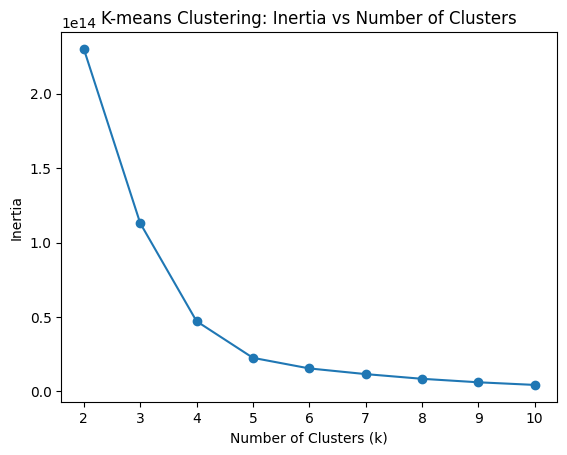

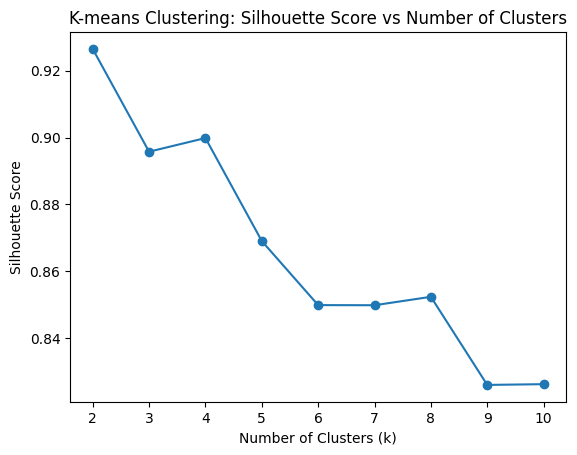

In [46]:
# K Mean

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



inertia_values = []
silhouette_scores = []

k_values = range(2, 11)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    
    model.fit(df_pca)
    
    inertia = model.inertia_
    silhouette = silhouette_score(df_pca, model.labels_)
    
    inertia_values.append(inertia)
    silhouette_scores.append(silhouette)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-means Clustering: Inertia vs Number of Clusters')
plt.show()

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('K-means Clustering: Silhouette Score vs Number of Clusters')
plt.show()


In [49]:
new_data = df.head(10000)

# Create a new CSV file with the selected rows
new_file_name = 'new.csv'

new_data.to_csv(r'C:\Users\Hp\OneDrive\Desktop\Assignments\Data Science\new.csv', index=False)